# ASTROPY.modeling Polynomial Fit

### INTRO
A small introduction to ASTROPY for those who are unfamiliar: ASTROPY is a suite of tools designed for researchers in astronomy, astrophysics, and cosmology. It provides functionality for a wide range of common problems in these fields including (but far from limited to) sky coordinate conversion, orbital mechanics, redshift analysis, and spectroscopic data reduction. This last application is where we find a basic implementation of a polynomial fit. The basic idea is this: in general spectra (eg from stars) are not perfectly aligned with a detector. For this reason researchers often want to examine a spectroscopic trace, which (from the ASTROPY tutorials) is "the path of a point source (star) spectrum through a two-dimensional dispersed spectrum."

### Example

In [1]:
# first we need to examine the spectrum; we use PIL (Pythong Imaging Library) on our .bmp file
from PIL import Image
import numpy as np

import pylab as pl

pl.rcParams['image.origin'] = 'lower'
pl.matplotlib.style.use('dark_background')

In [2]:
# our image file 
spec_file = "deneb_3s.bmp"

# open and store the image data
image_data = Image.open(spec_file)

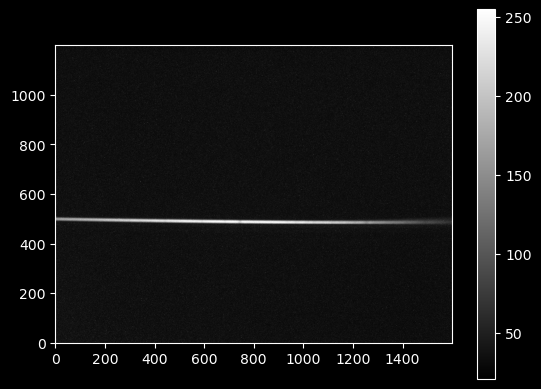

In [3]:
# view the image, with axes labeled
pl.imshow(image_data, cmap = 'gray')
pl.colorbar();

Our goal with using the trace is to obtain a model $ f(x) $ defining the vertical position of the signal along the detector. We want a model to give us the y-value of the centroid as a function of x.

In [4]:
# check shape and store image data to an array
image_array = np.array(image_data)
image_array, image_array.shape

(array([[39, 45, 49, ..., 58, 29, 29],
        [37, 26, 48, ..., 40, 31, 25],
        [44, 68, 26, ..., 28, 34, 33],
        ...,
        [40, 21, 25, ..., 28, 27, 32],
        [38, 31, 24, ..., 26, 47, 46],
        [34, 43, 27, ..., 26, 46, 32]], dtype=uint8),
 (1200, 1600))

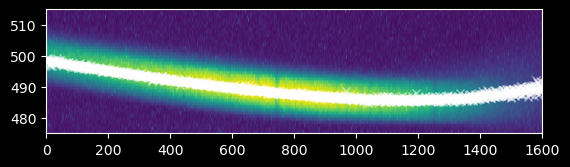

In [5]:
# obtain trace by measuring y-val at each x-val
yvals = np.argmax(image_data, axis=0)
xvals = np.arange(image_data.width)

yaxis = np.repeat(np.arange(475, 515)[:,None], image_array.shape[1], axis=1)
background = np.median(image_array)
# moment 1 is the data-weighted average of the Y-axis coordinates
weighted_yaxis_values = np.average(yaxis, axis=0, weights=image_array[475:515,:] - background)

# we need to use the 'extent' keyword to have the axes correctly labeled
pl.imshow(image_array[475:515,:], extent=[0,image_array.shape[1],475,515])
pl.gca().set_aspect(10) # we stretch the image out by 10x in the y-direction
pl.plot(xvals, weighted_yaxis_values, 'wx', alpha=0.5)
pl.axis((0,1600,475,515));

In [6]:
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.fitting import LinearLSQFitter

In [7]:
# fit data using a degree 3 polynomial
polymodel = Polynomial1D(degree=3)
fitted_polymodel = linfitter(polymodel, xvals[~bad_moments], weighted_yaxis_values[~bad_moments])
fitted_polymodel

NameError: name 'linfitter' is not defined

In [ ]:
pl.plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', alpha=0.5)
pl.plot(xvals, fitted_polymodel(xvals), color='r');

In [ ]:
pl.imshow(image_array[475:515,:], extent=[0,image_array.shape[1],475,515])
pl.gca().set_aspect(10)
pl.plot(xvals, fitted_polymodel(xvals), 'w')
pl.axis((0,1600,475,515));

In [ ]:
# use fit to extract the spectrum from the data

In [ ]:
from astropy.modeling.models import Gaussian1D
from astropy.modeling.fitting import LevMarLSQFitter
lmfitter = LevMarLSQFitter()
guess = Gaussian1D(amplitude=mean_trace_profile.max(), mean=0, stddev=5)
fitted_trace_profile = lmfitter(model=guess, x=trace_profile_xaxis, y=mean_trace_profile)
model_trace_profile = fitted_trace_profile(trace_profile_xaxis)
fitted_trace_profile

In [ ]:
average_spectrum = (cutouts - background).mean(axis=1)
pl.plot(average_spectrum);

### QUESTION

Is this particular package (astropy.modeling) built for speed or for comfort? That is to say, is this package designed more for ease of use or to be as efficient as possible?

### Experiment

Instead of using ```polynomial``` fit, we could use ```chebyshev``` or ```legendre``` or ```hermite``` and compare them to ```polynomial``` for speed and accuracy. 